<a href="https://colab.research.google.com/github/minjeon99/ESAA_YB/blob/Week6/w6_mon_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **04. 분류**

## **3. 앙상블 학습**

### **앙상블 학습 개요**
- **앙상블 학습(Ensemble Learning)**: 여러 개의 분류기 생성하여 예측 결합 => 단일 분류기보다 신뢰성 높은 예측값 도출
- 비정형 데이터 분류는 딥러닝 성능이 뛰어나지만, 정형 데이터 분류는 앙상블이 뛰어남.

**앙상블 알고리즘**
- 대표적인 알고리즘 랜덤 포레스트, 그래디언트 부스팅
- 최신 앙상블 모델 XGBoost, LightGBM, Stacking 등

**앙상블 학습의 유형**
- **보팅**: 서로 다른 알고리즘의 분류기를 결합해 투표로 최종 예측 결과 결정
- **배깅**: 같은 알고리즘 & 다른 데이터 샘플링 분류기를 결합해 보팅 수행
  - 부트스트래핑 분할 방식으로 개별 분류기에 학습 데이터 할당
    - **부트스트래핑(Bootstrapping)**: 원본 학습 데이터를 샘플링해 추출 - 중첩 허용
  - 랜덤 포레스트
  
  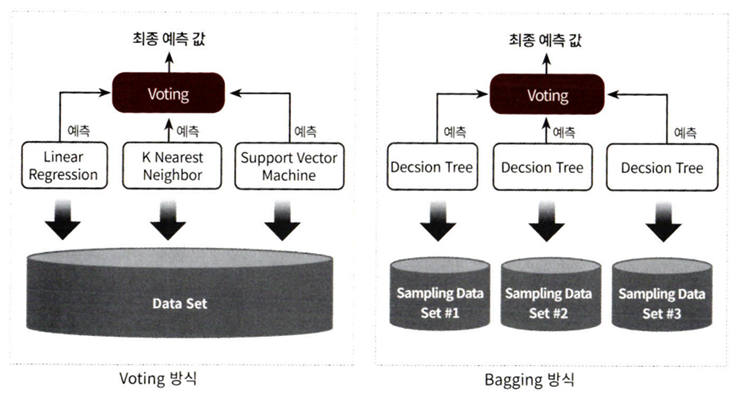
- **부스팅**: 여러 분류기가 순차 학습 수행 -> 예측 틀린 데이터에 가중치 부여
  - 그래디언트 부스트, XGBoost, LightGBM
- **스태킹**: 여러 모델의 예측 결괏값을 학습 데이터로 만들고 메타 모델을 재학습 시켜 예측

### **보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**
- **하드 보팅**: 다수결 원칙과 유사 - 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
- **소프트 보팅**: 분류기들의 레이블 값 결정 확률을 모두 더해서 평균 -> 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정
  - 일반적으로 소프트 보팅 이용

  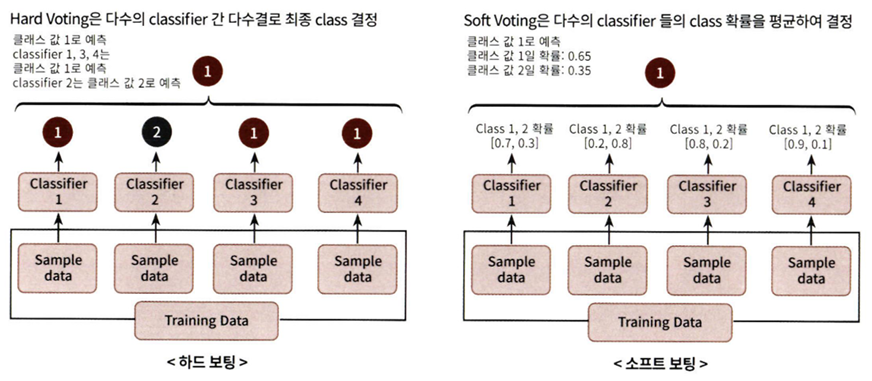

### **보팅 분류기(Voting Classifier)**
- 위스콘신 유방암 데이터 세트에 보팅 방식 앙상블 적용해 예측 분석
  - `load_breast_cancer()`
- 로지스틱 회귀, KNN 기반 보팅 분류기 생성

In [27]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


`VotingClassifier` 클래스
- 생성 인자
  - `estimators`: 리스트 값. 보팅에 사용된 Classifier 객체들 튜플 형식으로 입력
  - `voting`: `'hard'` = 하드 보팅(default), `'soft'` = 소프트 보팅

In [28]:
# 개별 모델: 로지스틱 회귀, KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


- 보팅 분류기 정확도가 조금 더 높지만, 무조건 보팅 결합했다고 해서 개별 기반 분류기보다 성능 향상 보장은 X
  
  기반 분류기 중 가장 좋은 분류기 성능이 보팅했을 때보다 나을 수도 있음

  그러나 전반적으로 앙상블 방법이 단일 ML 알고리즘보다 뛰어난 예측 성능 가지는 경우가 많음
- ML 모델의 성능은 다양한 테스트 데이터에 의해 검증

  => 높은 유연성 = 편향-분산 트레이드오프가 ML 모델이 극복할 중요 과제
- 배깅, 부스팅은 대부분 **결정 트리** 알고리즘 기반
  - 결정 트리 알고리즘 단점: 과적합이 발생해 실제 테스트 데이터에서 예측 성능 떨어지기 쉬움
  - 앙상블 학습 -> 많은 분류기 결합해 다양한 상황 학습
    
    => 결정 트리 알고리즘의 장점 취하고 단점 보완. 편향-분산 트레이드오프의 효과 극대화


## **4. 랜덤 포레스트**

### **랜덤 포레스트의 개요 및 실습**
**배깅(bagging)**: 같은 알고리즘으로 여러 개의 분류기 만들어서 보팅으로 최종 결정
- 대표적으로 랜덤 포레스트

**랜덤 포레스트**
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 데이터 샘플링해 개별 학습 수행
  
  -> 모든 분류기가 보팅을 통해 예측 결정

  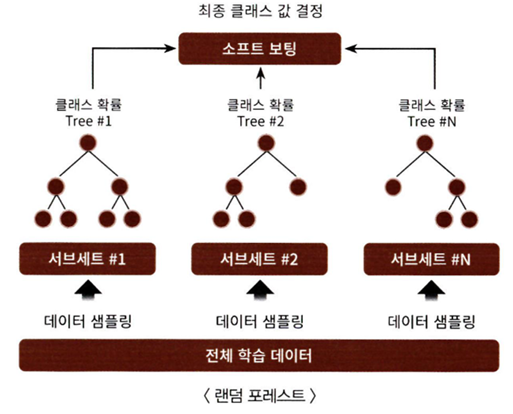
- 결정 트리 기반 알고리즘 => 쉽고 직관적인 장점 그대로 지님
- 빠른 수행 속도, 높은 예측 성능

- 개별 분류기의 기반 알고리즘: 결정 트리
- 랜덤 포레스트의 서브세트 데이터(개별 트리의 학습 데이터)

  : 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트 = **부트스트래핑(Bootstrapping)** 분할 방식
  - 부트스트랩: 여러 개의 작은 데이터 세트 만들어 개별 평균의 분포도 측정 등의 목적을 위한 샘플링 방식
    - bagging = Bootstrap aggregating
  - 서브세트(Subset) 데이터: 전체 데이터 건수와 동일 건수 // 개별 데이터가 중첩되어 생성

  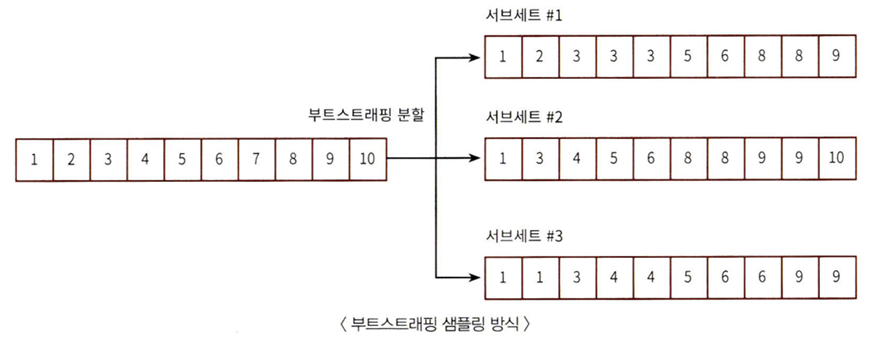
  - 원본 데이터 건수 10개, 3개의 결정트리 기반 학습 => `n_estimators=3`

- `RandomForestClassifier` 클래스

In [2]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [3]:
import pandas as pd

def get_human_dataset( ):

    feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


- 약 92.53% 정확도

### **랜덤 포레스트 하이퍼 파라미터 및 튜닝**
- `n_estimators`: 결정 트리의 개수 (default: 10). 많이 설정할수록 좋은 성능 기대할 수 있지만 무조건 계속 향상되는 것은 아님 & 학습 수행 시간 오래 걸림
- `max_features`: 랜덤 포레스트의 트리를 분할할 때 참조하는 피처 수 (default: `'auto'`=`'sqrt'`)

  e.g. 전체 피처 16개 -> 분할을 위해 4개 참조
- `max_depth`, `min_samples_leaf` 등 결정 트리의 과적합 개선 파라미터들도 똑같이 적용

- GridSearchCV를 이용한 랜덤 포레스트 하이퍼 파라미터 튜닝
  - n_estimators=100, CV=2 (튜닝 시간 절약)
- 다른 하이퍼 파라미터 최적화한 뒤에 n_estimators=300으로 증가시켜 예측 성능 평가
- 랜덤 포레스트는 CPU 병렬 처리 효과적으로 수행되어 빠른 학습 가능 => 그래디언트 부스팅보다 예측 성능 다소 떨어져도 lf로 기반 모델 구축하는 경우 다수
- `n_jobs=-1`: 멀티 코어 환경에서 모든 CPU 코어를 이용해 학습

In [4]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성, GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


- 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100일 때 평균 정확도 약 91.8%

In [5]:
# n_estimators = 300으로 증가
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)

# 별도의 테스트 데이터에서 예측 성능 측정
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


- 약 91.65%

- `feature_importances_`: 알고리즘이 선택한 피처의 중요도
- 피처 중요도 시각화

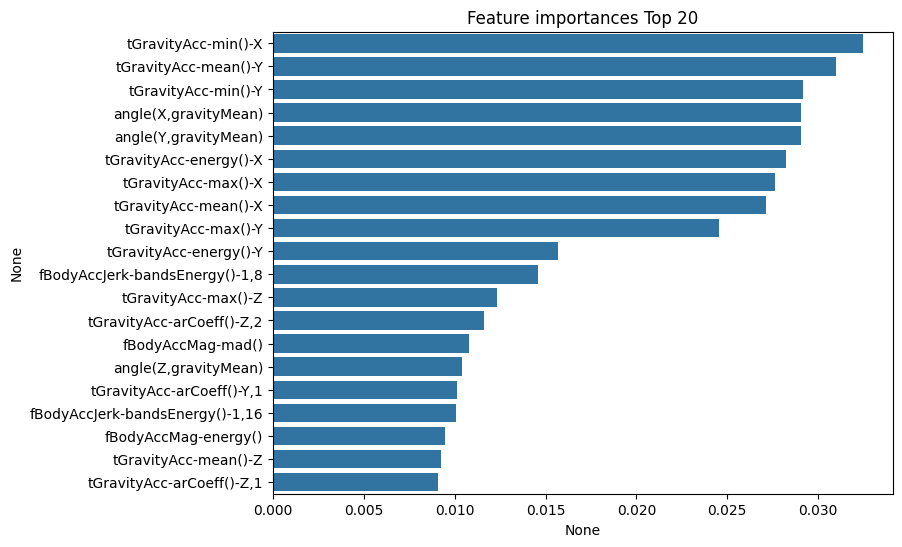

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## **5. GBM(Gradient Boosting Machine)**

### **GBM의 개요 및 실습**
**부스팅**: 여러 개의 weak learner를 순차적으로 학습-예측 -> 잘못 예측한 데이터에 가중치 부여 => 오류 개선해 나가며 학습
- 대표적으로 AdaBoost(Adaptive boosting), 그래디언트 부스트

**에이다 부스트**: 오류데이터에 가중치 부여하며 부스팅 수행

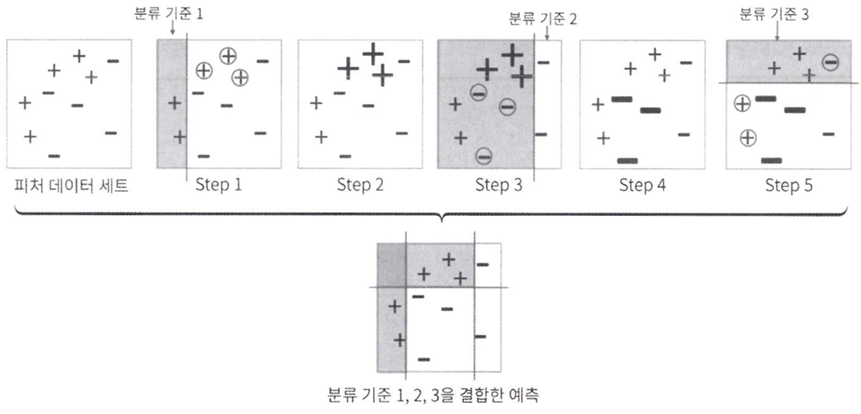
- **Step1** 첫 번째 weak learner가 분류 기준 1로 +, - 분류
  - 동그라미 표시: 오분류 데이터
- **Step2** 오류 데이터에 가중치 값 부여 -> 다음 weak learner가 더 잘 분류할 수 있게 크기 커짐
- **Step3** 두 번째 weak learner가 분류 기준 2로 +, - 분류
- **Step4** 다음 weark learner가 오류 데이터 잘 분류할 수 있게 더 큰 가중치 부여
- **Step5** 세 번째 weak learner가 분류 기준 3으로 +, - 분류 -> 오류 데이터 찾기

  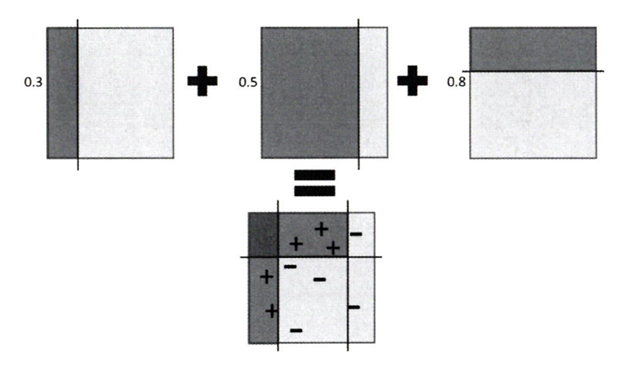
- weak learner가 순차적으로 오류 값에 대해 가중치 부여한 예측 결정 기준을 결합해 예측 수행
  - e.g. 1st -> 0.3, 2nd -> 0.5, 3rd -> 0.8 부여 후 모두 결합

  => 최종 예측 결과의 정확도가 개별 weak learner보다 훨씬 높아짐

**GBM(Gradient Boost Machine)**

: 에이다부스트와 유사 // **경사 하강법(Gradient Descent)**을 이용한 가중치 업데이트가 큰 차이점
- **경사 하강법**: 오류식 h(x) = y - F(x)을 최소화하는 방향성을 가지고 반복적으로 가중치 값 업데이트
  - 오류 값 = 실제값 - 예측값
- CART 기반 다른 알고리즘과 마찬가지로 분류, 회귀 모두 가능

- `GradientBoostingClassifier` 클래스

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정 위한 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 1030.2 초 


- 기본 하이퍼 파라미터만으로도 약 93.76% 예측 정확도(랜덤 포레스트보다 나은 성능)
- 한계: 긴 수행 시간, 하이퍼 파라미터 튜닝 노력 필요
  - 사이킷런 GradientBoostingClassifier는 약한 학습기의 순차적인 예측 오류 보정을 통한 학습
  
    => 멀티 CPU 코어 시스템을 사용해도 병렬 처리 지원 X

### **GBM 하이퍼 파라미터 및 튜닝**
- `loss`: 경사 하강법에서 사용할 비용 함수 (default: `'deviance'`, 특별한 이유 없으면 그대로 적용)
- `learning_rate`: 학습률 = Weak learning가 오류 값 보정해 나가는 데 적용하는 계수. **범위** = 0~1 (default: 0.1)
  - 너무 큰 값(많은 weak learner) -> 수행 시간 오래 걸림
  - 너무 작은 값 -> 반복이 끝나도 최소 오류 값 찾지 못할 수 있음
- `n_estimators`: weak learner 개수
- `subsample`: weak learner가 학습에 사용하는 데이터의 샘플링 비율 (default=1)
  - 1 -> 전체 학습 데이터 기반 학습, 0.5 -> 학습 데이터의 50%
  - 과적합 염려되는 경우 1보다 작은 값으로 설정

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


- learning_rate=0.05, n_estimators=500일 때 90.1%의 최고 정확도 도출

In [ ]:
# GridSearchCV에서 최적으로 학습된 estimator로 predict 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

- 약 94.1% 정확도
---
GBM은 과적합에도 강한 뛰어난 예측 성능을 가졌으나 수행 시간이 오래 걸림

## **6. XGBoost(eXtra Gradient Boost)**
- 트리 기반 앙상블 학습에서 가장 각광받는 알고리즘 중 하나
  - 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능
  - GBM에 기반하고 있지만, 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제 해결
- 주요 장점

  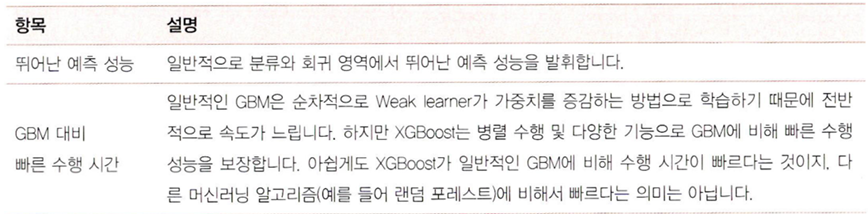

  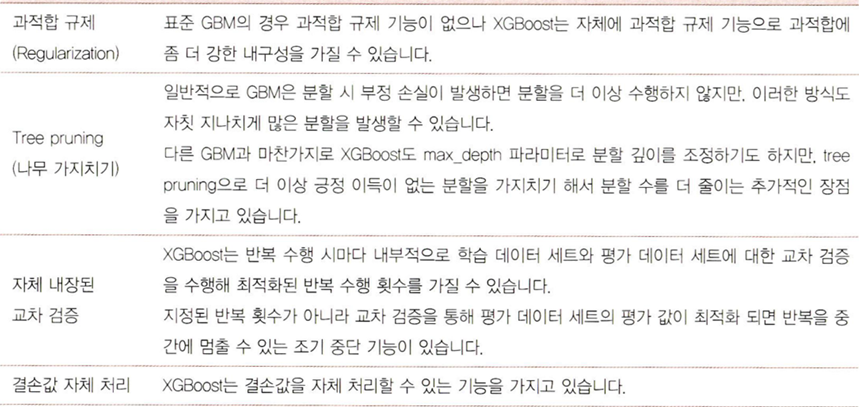

- XGBoost의 핵심 라이브러리는 C/C++로 작성
  - 파이썬 패키지 `xgboost`도 제공 (대부분 C/C++ 핵심 라이브러리를 호출하는 것)

**xgboost 패키지**

: XGBoost 전용 파이썬 패키지와 사이킷런 호환 래퍼용 XGBoost가 함께 존재
- 초기 패키지: 사이킷런 프레임워크 기반 X
  
  => fit(), predict() 등 메서드 적용 X & 다양한 유틸리티(cross_val_score, GridSearchCV, Pipeline 등)와 함께 사용 X

  -> 이후 사이킷런과 연동되는 래퍼 클래스(Wrapper class) 제공 = `XGBClassifier`, `XGBRegrssor`
- 초기 독자적인 XGBoost 프레임워크 기반 XGBoost -> **파이썬 래퍼 XGBoost 모듈**
- 사이킷런 연동 모듈 -> **사이킷런 래퍼 XGBoost 모듈**

### **XGBoost 설치하기**
- 아나콘다 이용

  ```
  conda install -c anaconda py-xgboost
  ```



In [13]:
import xgboost as xgb
from xgboost import XGBClassifier

### **파이썬 래퍼 XGBoost 하이퍼 파라미터**
- GBM과 유사한 하이퍼 파라미터 + **조기 중단(early stopping), 과적합 규제 하이퍼 파라미터** 등 추가
**파이썬 래퍼 XGBoost 하이퍼 파라미터 유형**
- 일반 파라미터: 스레드 개수, slient 모드 등의 선택. 거의 바꾸지 X
- 부스터 파라미터: 트리 최적화, 부스팅, regulation 등과 관련 파라미터
- 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가 지표 등 설정

**주요 일반 파라미터**
- `booster`: gbtree(default), gblinear
- `silent`: default = 0 <-> 1 = 출력 메시지 출력 X
- `nthread`: CPU 실행 스레드 개수 조정

**주요 부스터 파라미터**

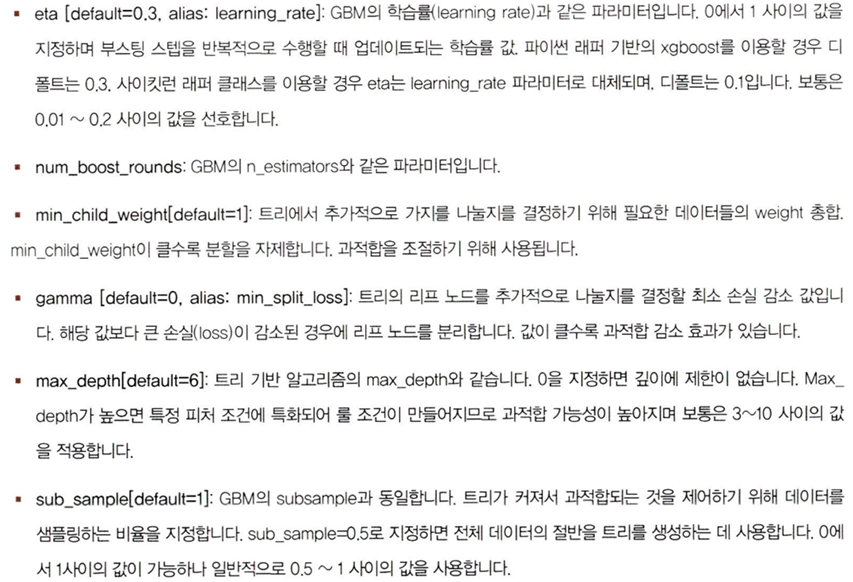

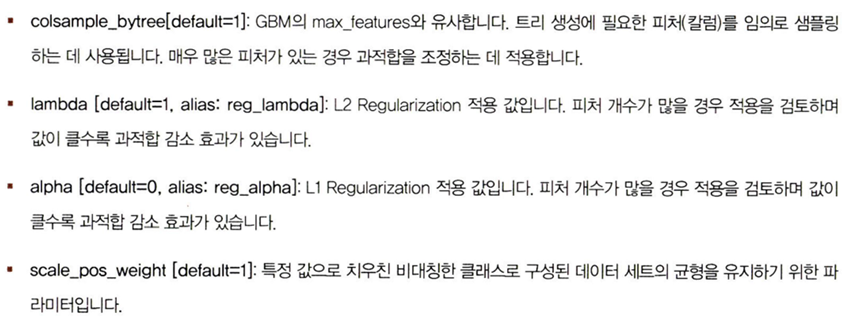

**학습 태스크 파라미터**

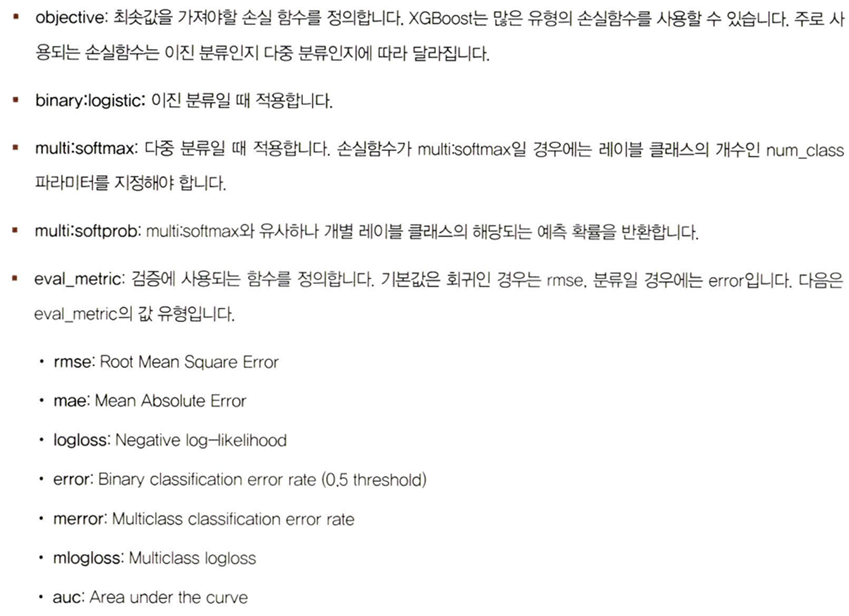

**과적합 문제 개선 방향**
- `eta` 낮추기(0.01~0.1) & `num_round`(=`n_estimators`) 높이기
- `max_depth` 낮추기
- `min_child_weight` 높이기
- `gamma` 높이기
- `subsample`, `colsample_bytree` 조정도 복잡한 트리 생성 막아 과적합 문제에 도움될 수 있음
---
- XGBoost 자체 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능 가짐
- 기본 GBM에서 부족한 여러 성능 향상 기능
  - 수행 속도 향상을 위한 Early Stopping(조기 중단): 조기 중단 값만큼 반복하는 동안 학습 오류 감소하지 않으면 부스팅 종료

In [12]:
import xgboost

print(xgboost.__version__)

2.0.3


### **파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

In [17]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


- 종양의 크기, 모양 관련 많은 속성이 숫자형 값으로 입력됨
- 타겟 레이블 값의 종류: 악성 -> 0, 양성 -> 1

In [18]:
# 레이블값 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


- 양성(1): 357개, 악성(0): 212개
- 20%를 테스트용 데이터로 분할

In [19]:
# 전체 데이터 중 80% -> 학습 데이터, 20% -> 테스트 데이터
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


파이썬 래퍼 XGBoost와 사이킷런의 차이점: 학습/테스트 데이터 세트를 위해 별도 객체 **DMatrix 생성**
- **DMatrix**: 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트
  - 주요 입력 파라미터: data, label
- DataFrame으로 데이터 인터페이스 하기 위해 DataFrame.values를 이용해 넘파이로 일차 변환 -> DMatrix 변환 적용

In [20]:
# 넘파이 형태의 학습/테스트 데이터 세트를 DMatrix로 변환
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [21]:
params = {'max_depth':3, # 트리 최대 깊이
          'eta': 0.1, # XGBClassifier의 learning_rate
          'objective':'binary:logistic', # 목적함수: 이진분류 => 이진 로지스틱
          'eval_metric':'logloss', # 오류 함수 평가 성능 지표
          'early_stoppings':100
         }
num_rounds = 400 # 부스팅 반복 횟수

**XGBoost 모델 학습**
- **하이퍼 파라미터**: train() 함수에 파라미터로 전달 (<-> 사이킷런: Estimator의 생성자를 하이퍼 파라미터로 전달)
- **조기 중단**: train() 함수에 `early_stopping_rounds` 파라미터 입력
  - **eval_set**: 성능 평가 수행할 평가용 데이터 세트
  - **eval_metrics**: 평가 세트에 적용할 성능 평가 방법. 분류 -> 주로 'error'(분류 오류), 'logloss' 적용
  - **evals**: 학습 데이터 세트, eval 데이터 세트 명기 -> eval 데이터 세트에 평가 수행하며 조기 중단 적용
    - 이경우 반드시 `eval_set`, `eval_metric` 함께 지정해 전달

In [22]:
# 학습 데이터 셋: 'train', 평가 데이터 셋: 'eval' 로 명기
wlist = [(dtrain,'train'),(dtest,'eval')]

# 하이퍼 파라미터, early stopping 파라미터 -> train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds=100, evals=wlist )

[0]	train-logloss:0.58431	eval-logloss:0.56554
[1]	train-logloss:0.51885	eval-logloss:0.50669
[2]	train-logloss:0.46457	eval-logloss:0.45868
[3]	train-logloss:0.41713	eval-logloss:0.41822
[4]	train-logloss:0.37585	eval-logloss:0.38103
[5]	train-logloss:0.34075	eval-logloss:0.35137
[6]	train-logloss:0.31028	eval-logloss:0.32588
[7]	train-logloss:0.28283	eval-logloss:0.30127
[8]	train-logloss:0.25925	eval-logloss:0.28197
[9]	train-logloss:0.23822	eval-logloss:0.26265
[10]	train-logloss:0.21951	eval-logloss:0.24821
[11]	train-logloss:0.20251	eval-logloss:0.23231
[12]	train-logloss:0.18759	eval-logloss:0.22079
[13]	train-logloss:0.17386	eval-logloss:0.20795
[14]	train-logloss:0.16199	eval-logloss:0.19764
[15]	train-logloss:0.15109	eval-logloss:0.18950
[16]	train-logloss:0.14056	eval-logloss:0.18052
[17]	train-logloss:0.13137	eval-logloss:0.17246
[18]	train-logloss:0.12329	eval-logloss:0.16512
[19]	train-logloss:0.11565	eval-logloss:0.15828
[20]	train-logloss:0.10860	eval-logloss:0.15436
[2

**output**

train()으로 학습 반복 수행 시 train-error, eval-logloss 지속적으로 감소

---
**테스트 데이터 예측 수행**
- `train()` 함수 호출하면 학습 완료된 모델 객체 반환 -> 예측 위해 `predict()` 메서드 이용
- xgboost의 predict(): 예측 결괏값(X), 예측 확률 값 반환(O)

  => 이진 분류이므로 0.5보다 크면 1, 작으면 0으로 예측하는 로직 추가

In [23]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1, 그렇지 않으면 0 으로 예측값 결정하여 리스트 객체 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.904 0.004 0.908 0.267 0.992 1.    1.    0.999 0.994 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


**예측 성능 평가**

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [25]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9951


**피처 중요도 시각화**: xgboost 패키지 내장 시각화 기능 이용

- `plot_importance()`: 기본 평가 지표 = f1 스코어 기반으로 각 피처 중요도를 막대그래프로 나타냄

  <-> 사이킷런: Estimator 객체의 `feature_importances_` 속성으로 직접 시각화 코드 작성
- xgboost 넘파이 기반의 피처 데이터 -> 학습 시 피처명 제대로 알 수 X

  => 피처 순서별로 f1, f2, ...

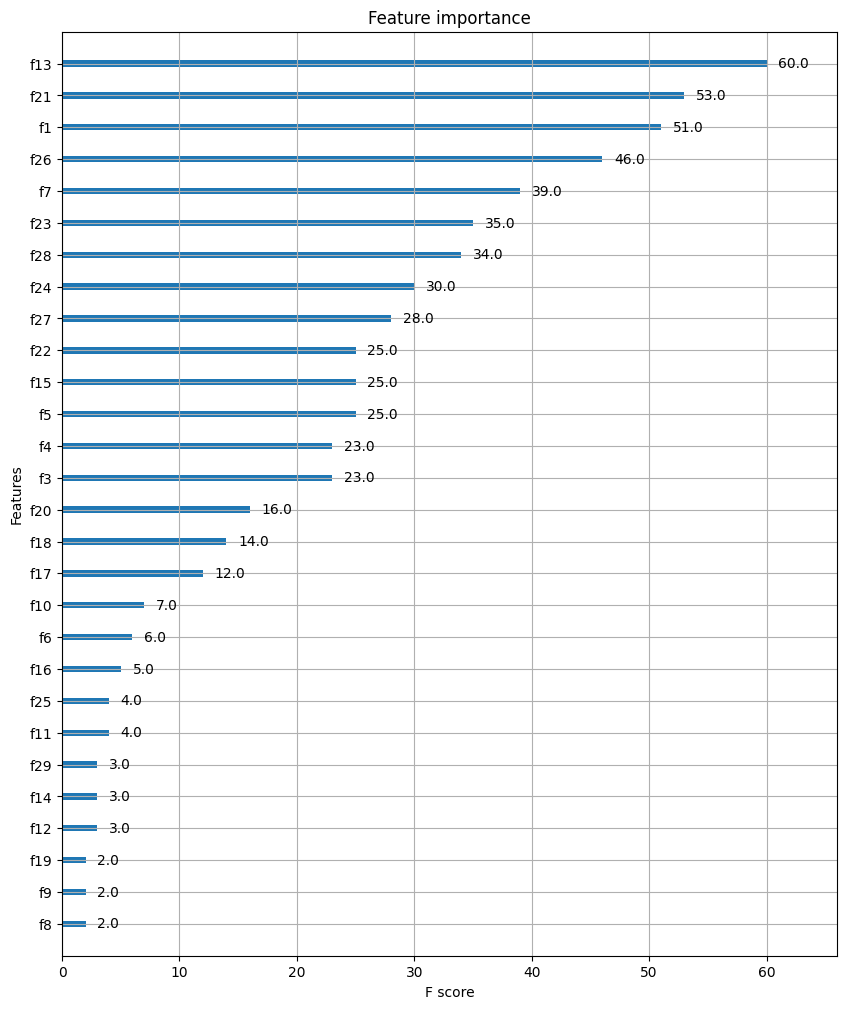

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

- **트리 기반 규칙 구조**도 xgboost에서 시각화 가능
  - xgboost 모듈의 to_graphviz() 이용
  - 파라미터에 학습이 완료된 모델 객체, 참조할 파일명 입력
- `cv()`: GridSearchCV와 유사한 **교차 검증 수행 & 최적 파라미터** API

  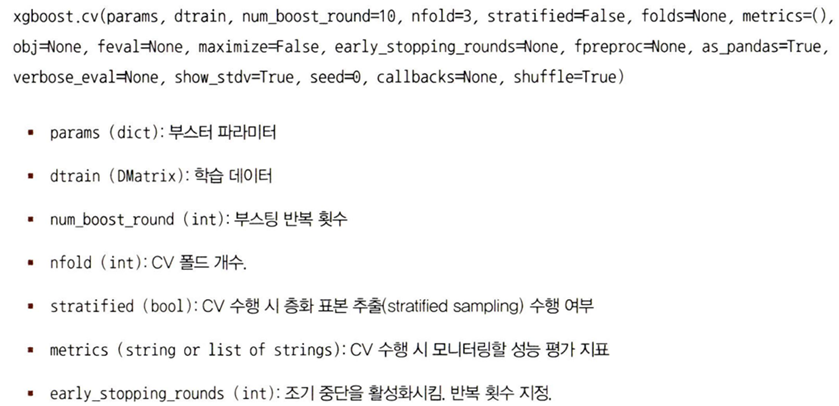

### **사이킷런 래퍼 XGBoost의 개요 및 적용**
- 분류: `XGBClassifier` 클래스, 회귀: `XGBRegressor` 클래스
---
**하이퍼 파라미터** 파이썬 래퍼와 사이킷런 래퍼에 약간의 차이가 있음
- eta -> learning_rate
- sub_sample -> subsample
- lambda -> reg_lambda
- alpha -> reg_alpha

In [21]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier import
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [22]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9947


앞 예제의 파이썬 래퍼 XGBoost와 동일한 평가 결과

**조기 중단**
- `fit()`에 조기 중단 관련 파라미터 입력
  - `early_stopping_rounds`, `eval_metrics`, `eval_set`

In [23]:
# 데이터 크기가 작아서 테스트 데이터를 평가 데이터로 사용했지만,
# 과적합할 수 있기 때문에 바람직하지 않음
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos

- n_estimators를 400으로 설정해도 311번 반복 후 학습 완료
  - 211번 반복 시 logloss=0.085593, 311번 반복 시 logloss=0.085948

    => early_stopping_rounds=100으로 지정된 100번 반복 동안 성능 평가 지수 향상 X -> 학습 멈춤

  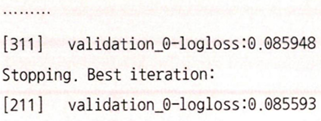

In [24]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9951


- 조기 중단 적용되지 않은 결과보다 약간 저조한 성능이지만 큰 차이는 아님

**조기 중단값을 급격하게 줄이는 경우**
- 예측 성능 저하 우려가 큼
- early_stopping_rounds=10 -> 성능 향상 여지가 있음에도 10번 반복 동안 향상되지 않으면 학습 멈춰버림

  => 충분한 학습 되지 않아 예측 성능 나빠질 수 있음

In [25]:
# early_stopping_rounds를 10으로 설정하고 재 학습.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10,
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos

62번 반복 후 학습 종료
- 52th: logloss=0.089577
- 62th: logloss=0.090311

정확도: 약 0.9561

=> early_stopping_rounds=100일 때의 0.9649보다 낮음

**피처 중요도 시각화**
- 사이킷런 plot_importace() 이용
  
  -> 파이썬 래퍼 클래스와 동일한 결과

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

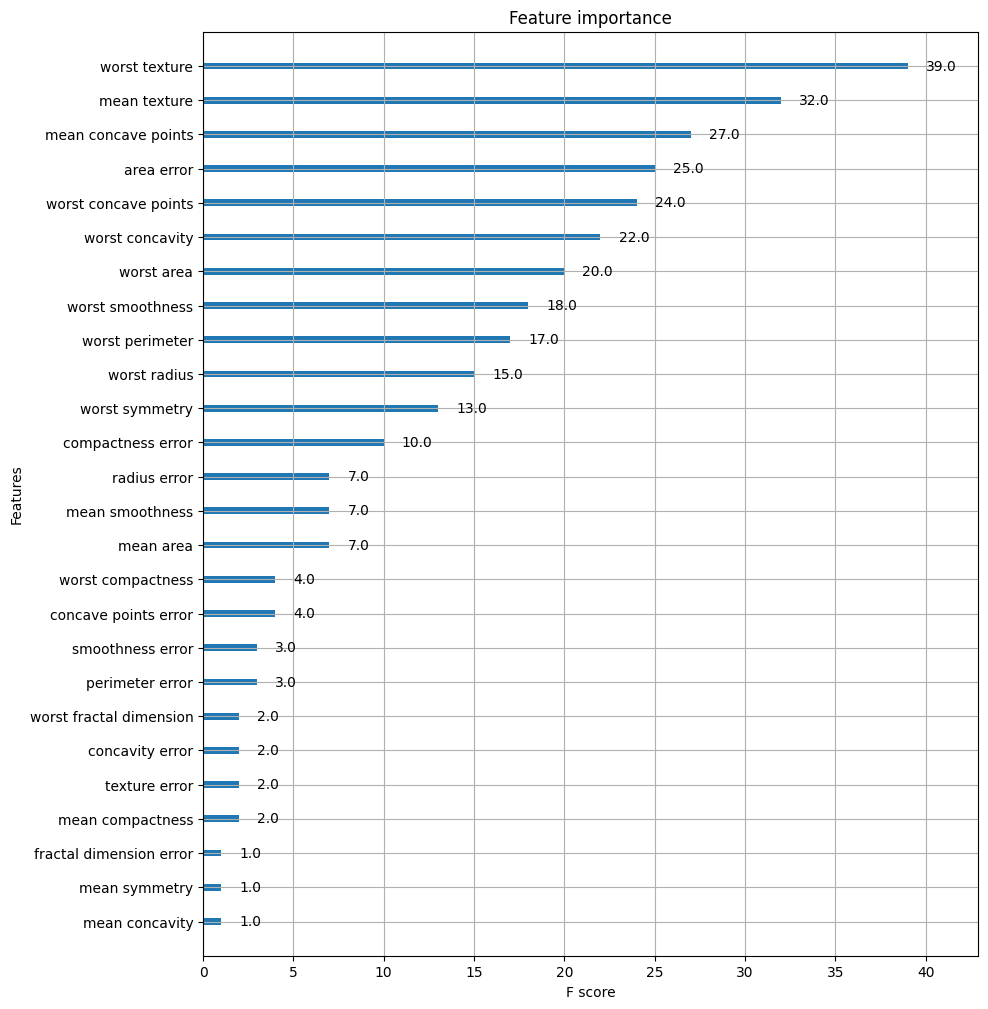

In [26]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)